# Part 1: Playing with tabular data. The Iris Dataset.

The Iris dataset is a well-known and frequently used dataset in the field of machine learning and statistics. It was introduced by British biologist and statistician Ronald A. Fisher in 1936. The dataset consists of samples from three different species of Iris flowers, namely Setosa, Versicolor, and Virginica. Each species is represented by 50 samples, resulting in a total of 150 data points.

**Features**: The dataset contains four features (attributes) for each sample:

1. Sepal Length (in centimeters)
2. Sepal Width (in centimeters)
3. Petal Length (in centimeters)
4. Petal Width (in centimeters)

**Target Variable**: There is one target variable representing the species of each Iris flower sample. The target variable consists of three classes:
- Setosa (Class 0)
- Versicolor (Class 1)
- Virginica (Class 2)


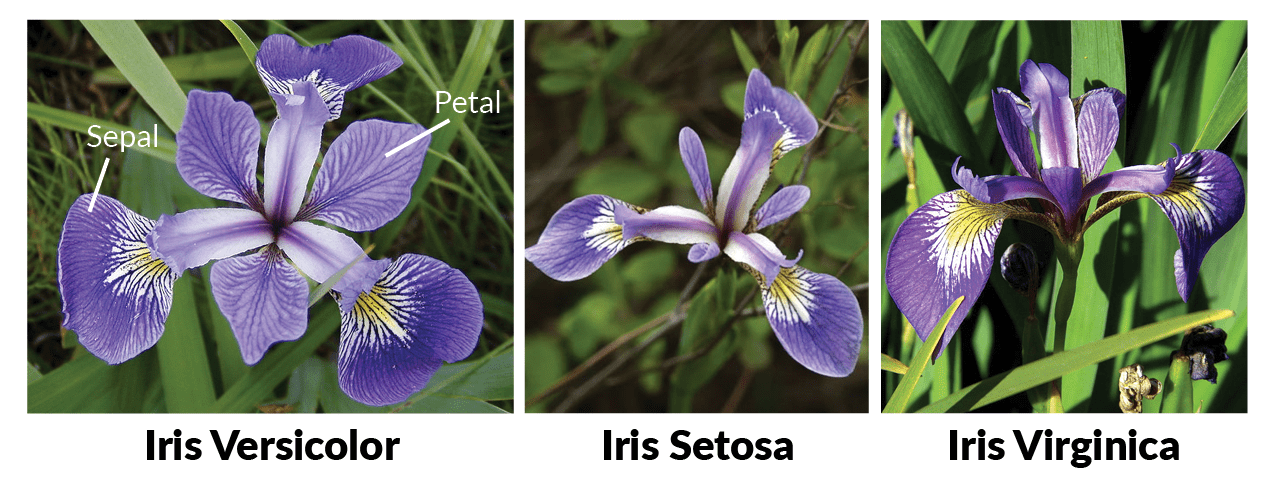

## Exercise 1: Load and understand the data.

In [32]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Download the dataset in csv format. (https://www.kaggle.com/datasets/arshid/iris-flower-dataset)

Load the dataset into a variable **iris**

In [33]:
from sklearn import datasets
iris = datasets.load_iris()

Now create a function that plots two of the columns of the dataset (e.g. sepal length vs petal length) in a [scatter plot](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py). You can use the instructions:

*   `plt.figure()` to create a new figure
*   `ax.scatter(x_values, y_values)` to plot points (x,y) from two arrays.



Example: Visualizing sepal length vs petal length


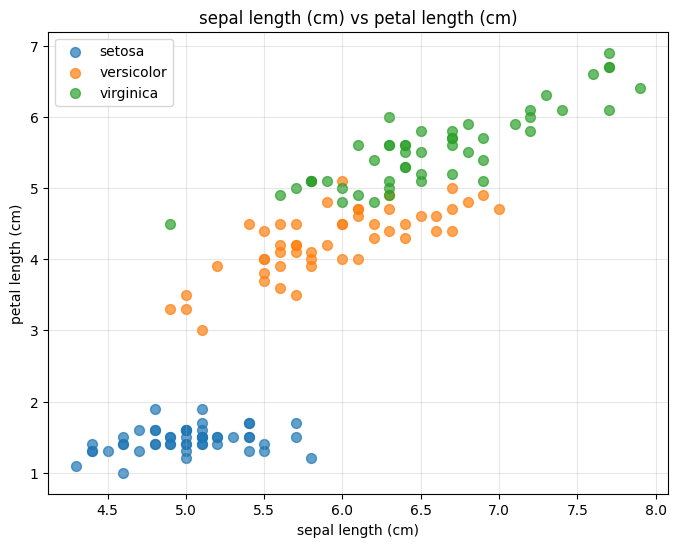

In [34]:
# Create function to visualize features in a scatter plot
def visualize_features(dataset, feature1_idx, feature2_idx):
    """
    Plot two features of the Iris dataset
    
    Parameters:
    -----------
    dataset : sklearn dataset
        The Iris dataset
    feature1_idx : int
        Index of first feature (0-3)
    feature2_idx : int
        Index of second feature (0-3)
    """
    x_values = dataset.data[:, feature1_idx]
    y_values = dataset.data[:, feature2_idx]
    
    plt.figure(figsize=(8, 6))
    
    # Plot each class with different color
    for i, target_name in enumerate(dataset.target_names):
        indices = dataset.target == i
        plt.scatter(x_values[indices], y_values[indices], 
                   label=target_name, alpha=0.7, s=50)
    
    plt.xlabel(dataset.feature_names[feature1_idx])
    plt.ylabel(dataset.feature_names[feature2_idx])
    plt.title(f'{dataset.feature_names[feature1_idx]} vs {dataset.feature_names[feature2_idx]}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Test the function
print("Example: Visualizing sepal length vs petal length")
visualize_features(iris, 0, 2)

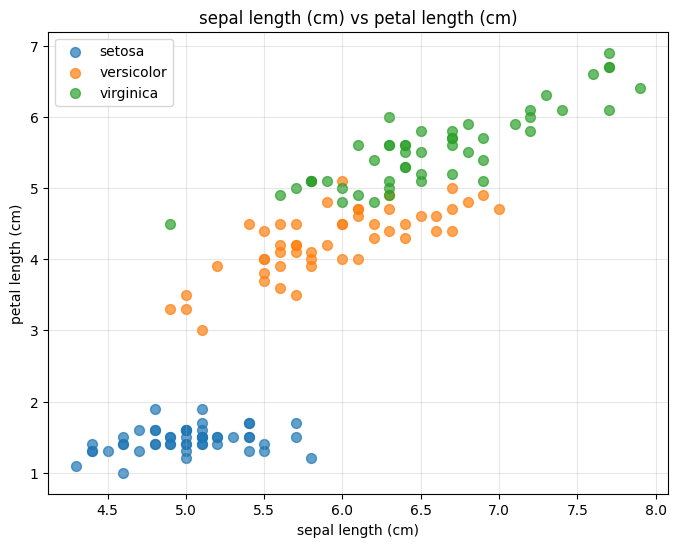

In [22]:
visualize_features(iris, 0,2)

With the function you implemented before, now visualize all the 6 combinations of features.

Visualizing all 6 feature combinations:



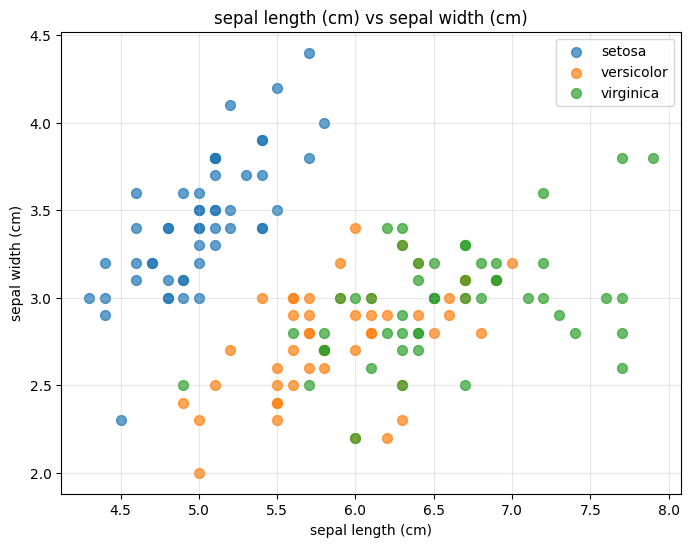

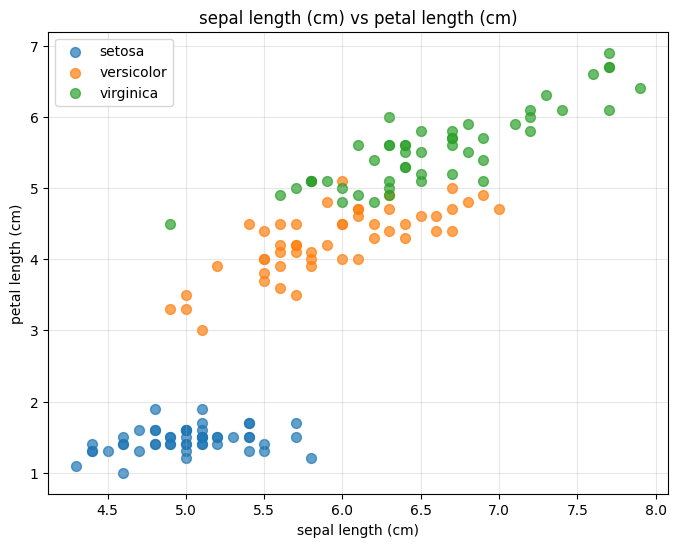

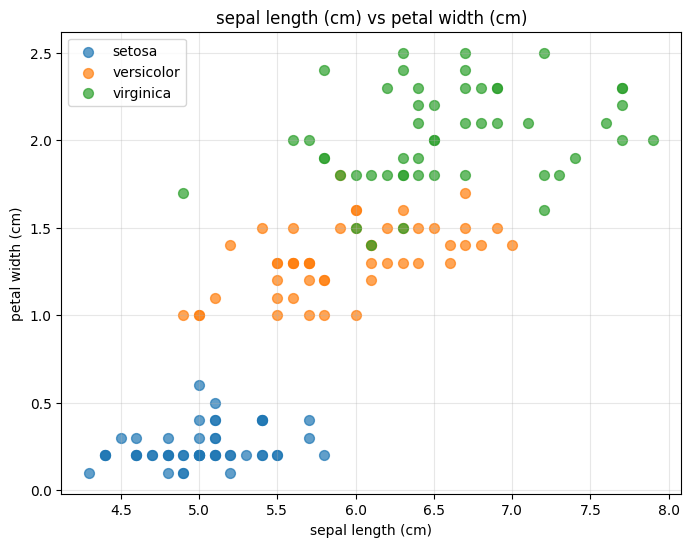

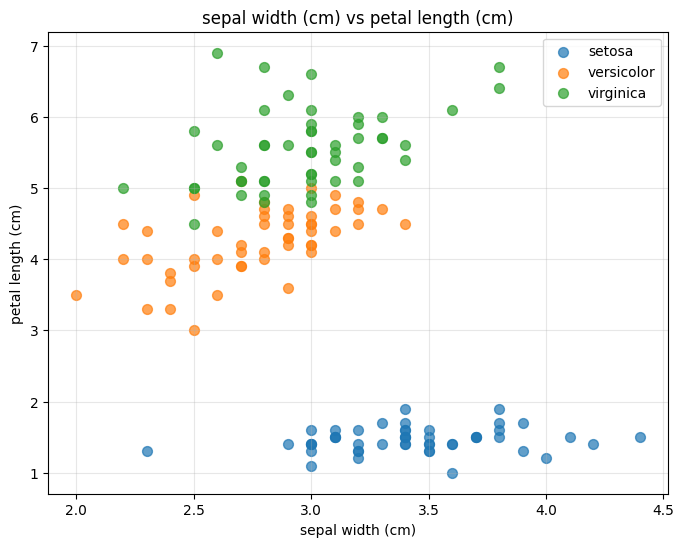

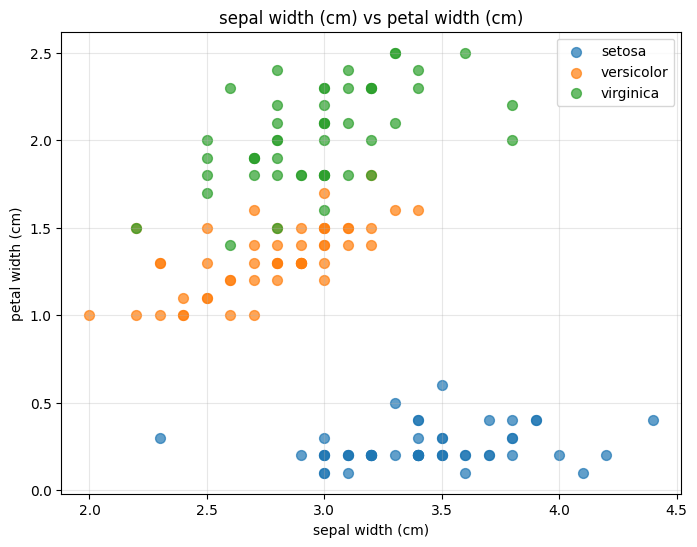

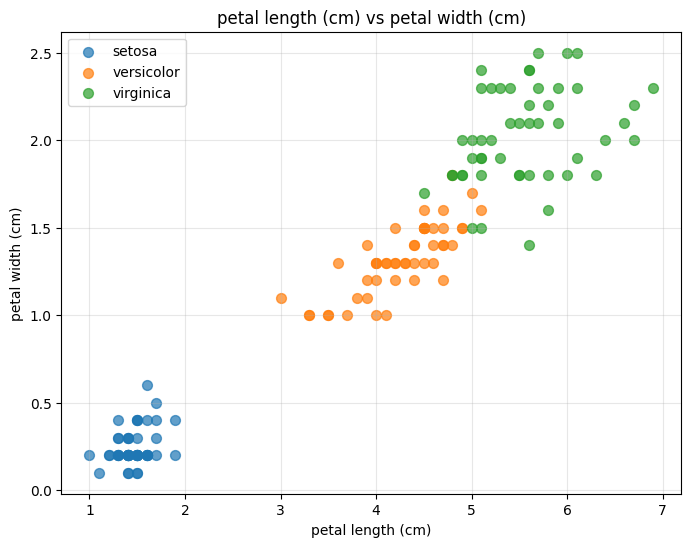

In [35]:
# Visualize all 6 combinations of features
# Features: 0=sepal length, 1=sepal width, 2=petal length, 3=petal width

print("Visualizing all 6 feature combinations:\n")

# All possible combinations of 4 features (C(4,2) = 6 combinations)
combinations = [
    (0, 1),  # sepal length vs sepal width
    (0, 2),  # sepal length vs petal length
    (0, 3),  # sepal length vs petal width
    (1, 2),  # sepal width vs petal length
    (1, 3),  # sepal width vs petal width
    (2, 3)   # petal length vs petal width
]

for feature1, feature2 in combinations:
    visualize_features(iris, feature1, feature2)

## Excercise 2 - using the dataset

### En el cas de tenir malament l'apartat anterior, carrego el dataset a través de sklearn per estar tots en el mateix punt.

In [36]:
from sklearn import datasets
iris = datasets.load_iris()



Now split the dataset in X (features) and Y (labels).

Then create a function that splits into train/ test based on % amount.

In [37]:
# Split dataset into features (X) and labels (y)
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Labels: 0=setosa, 1=versicolor, 2=virginica

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Number of samples: {len(X)}")
print(f"Number of features: {X.shape[1]}")

# Create function to split data into train and test sets
def data_splitter(X, y, train_ratio):
    """
    Split data into training and testing sets
    
    Parameters:
    -----------
    X : array-like
        Features matrix
    y : array-like
        Labels array
    train_ratio : float
        Ratio of training data (e.g., 0.7 for 70% training, 30% testing)
    
    Returns:
    --------
    X_train, y_train, X_test, y_test
    """
    # Calculate split index
    n_samples = len(X)
    n_train = int(n_samples * train_ratio)
    
    # Shuffle indices for random split
    indices = np.random.permutation(n_samples)
    
    # Split indices
    train_idx = indices[:n_train]
    test_idx = indices[n_train:]
    
    # Split data
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    
    print(f"\nData split with {train_ratio*100:.0f}% training:")
    print(f"Training samples: {len(X_train)}")
    print(f"Testing samples: {len(X_test)}")
    
    return X_train, y_train, X_test, y_test

Features shape: (150, 4)
Labels shape: (150,)
Number of samples: 150
Number of features: 4


Use the function that you created previously to split the data so that we can use the 70% of data for training and the 30% for testing.

In [38]:
X_train, y_train, X_test, y_test = data_splitter(X, y, 0.7)


Data split with 70% training:
Training samples: 105
Testing samples: 45


In [40]:
# Helper function to visualize decision boundaries
def plot_decision_boundary(model, X, y, title, feature_idx=[2, 3]):
    """
    Plot decision boundaries for a trained classifier
    
    Parameters:
    -----------
    model : trained classifier
        The model to visualize
    X : array-like
        Full feature matrix
    y : array-like
        Labels
    title : str
        Plot title
    feature_idx : list
        Indices of two features to plot [default: [2,3] = petal length, petal width]
    """
    # Select two features for visualization
    X_2d = X[:, feature_idx]
    
    # Create mesh grid
    h = 0.02  # step size in the mesh
    x_min, x_max = X_2d[:, 0].min() - 0.5, X_2d[:, 0].max() + 0.5
    y_min, y_max = X_2d[:, 1].min() - 0.5, X_2d[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Create a temporary model with only 2 features
    from sklearn.base import clone
    model_2d = clone(model)
    
    # Retrain on 2D data
    if hasattr(model, 'fit'):
        model_2d.fit(X_2d, y)
    
    # Predict on mesh
    Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    
    # Plot data points
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, 
                         cmap='viridis', edgecolors='black', 
                         s=50, alpha=0.8)
    
    plt.xlabel(iris.feature_names[feature_idx[0]], fontsize=12)
    plt.ylabel(iris.feature_names[feature_idx[1]], fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.colorbar(scatter, label='Class')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("Decision boundary visualization function created!")

Decision boundary visualization function created!


### Logistic Regression
Let's first train a Logistic Regression model (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression).

Logistic Regression Accuracy: 0.9333
Number of correctly classified samples: 42 out of 45


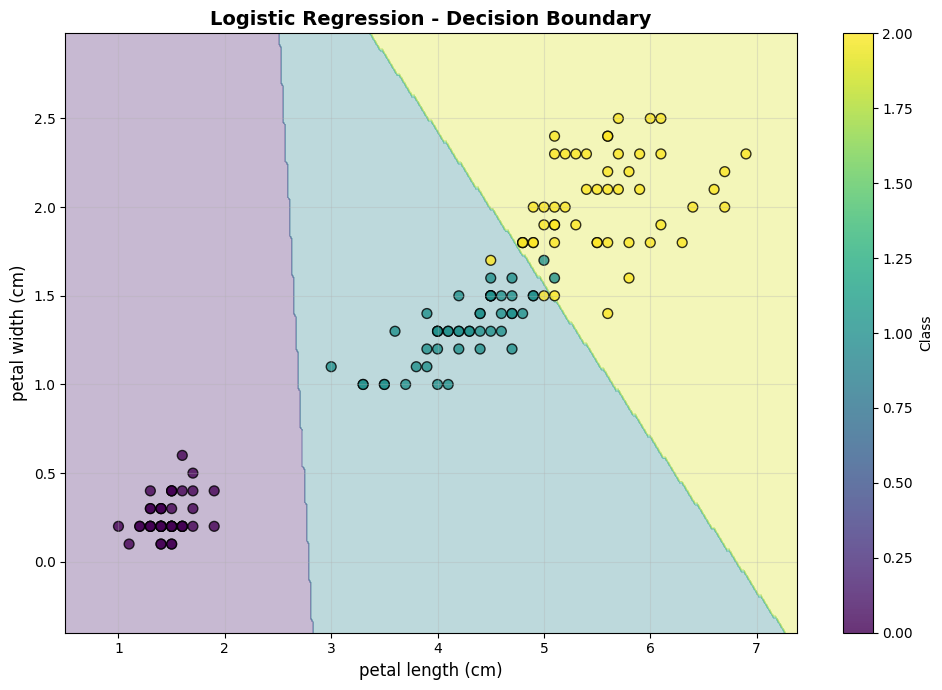

In [41]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Create and train the model
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_lr = lr_model.predict(X_test)

# Calculate accuracy
accuracy_lr = lr_model.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Number of correctly classified samples: {sum(y_pred_lr == y_test)} out of {len(y_test)}")

# Visualize decision boundary
plot_decision_boundary(lr_model, X, y, 
                      'Logistic Regression - Decision Boundary')

Check the `ConfusionMatrixDisplay.from_predictions` [function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) and use it to visualize the confusion matrix for the test set.

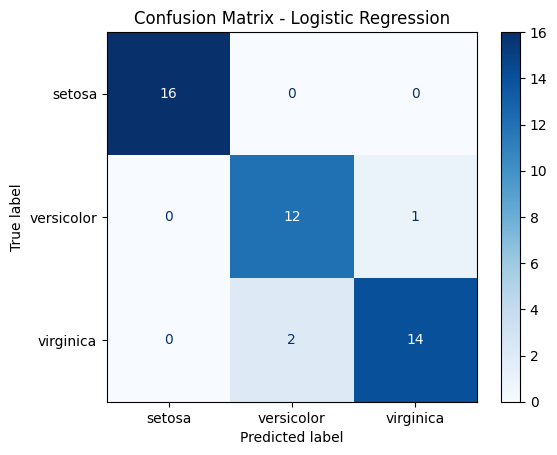

In [43]:
# Visualize Confusion Matrix for Logistic Regression
from sklearn.metrics import ConfusionMatrixDisplay

# Create confusion matrix display
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, 
                                       display_labels=iris.target_names,
                                       cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### Decision Tree

Let's now train a DecisionTreeClassifier (https://scikit-learn.org/stable/modules/tree.html#decision-trees). We will train it, predict the test set, visualize the classification tree and its confusion matrix.

Decision Tree Accuracy: 0.9556


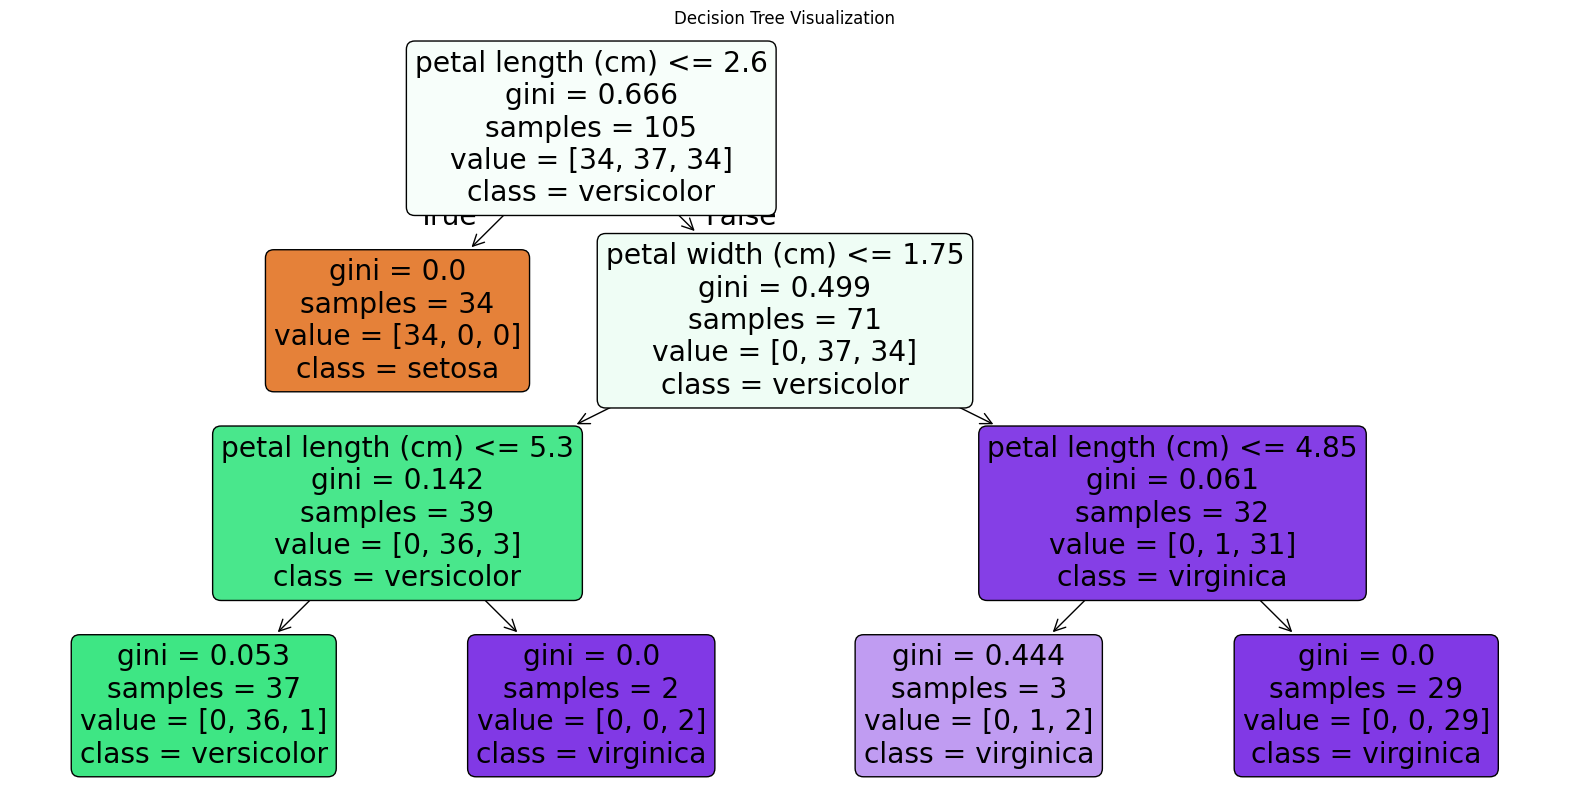

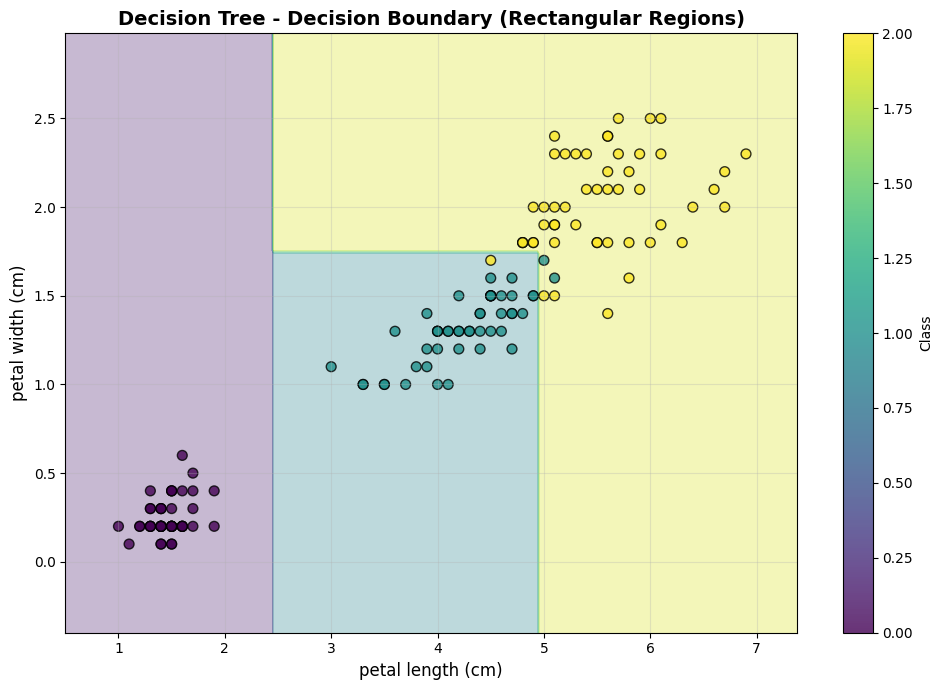

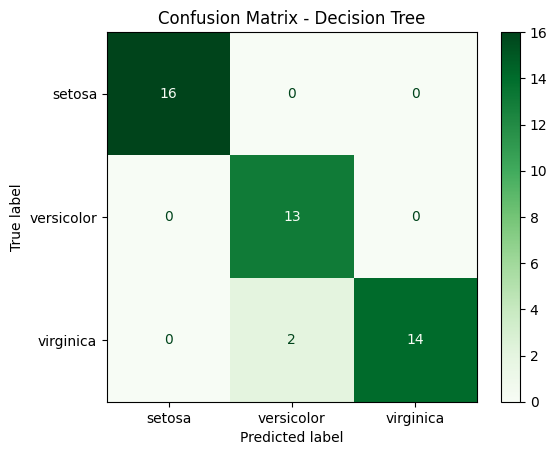

In [44]:
# Train Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create and train the model
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
accuracy_dt = dt_model.score(X_test, y_test)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
         feature_names=iris.feature_names, 
         class_names=iris.target_names,
         filled=True, 
         rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

# Visualize decision boundary
plot_decision_boundary(dt_model, X, y, 
                      'Decision Tree - Decision Boundary (Rectangular Regions)')

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, 
                                       display_labels=iris.target_names,
                                       cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

Check the tree that we just plot... Now check the plots of the beginning. Do you see the relation between them?

### Forests

How to solve Decision Tree problems?


Random Forest Accuracy: 0.9333
Number of trees: 100

Feature Importance:
             feature  importance
2  petal length (cm)    0.452083
3   petal width (cm)    0.437442
0  sepal length (cm)    0.100089
1   sepal width (cm)    0.010386


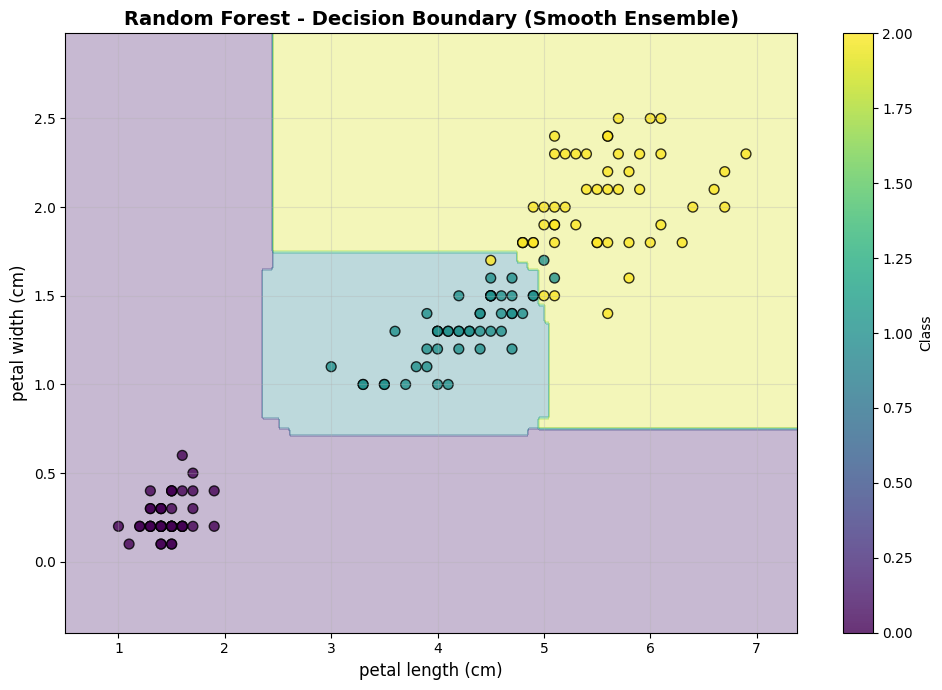

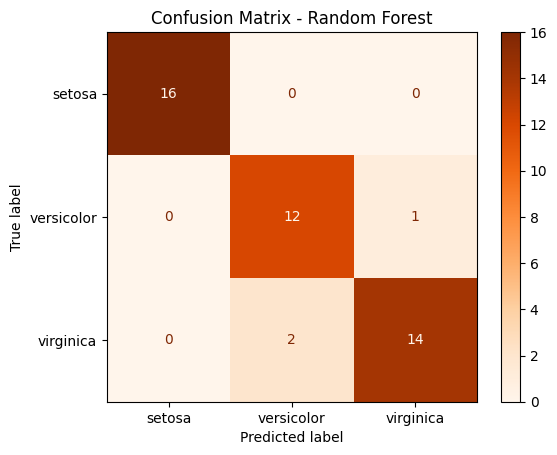

In [45]:
# Train Random Forest Classifier
# Random Forest solves Decision Tree problems by:
# 1. Reducing overfitting through ensemble learning
# 2. Combining predictions from multiple trees
# 3. Using bootstrap sampling and feature randomness

from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Number of trees: {rf_model.n_estimators}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize decision boundary
plot_decision_boundary(rf_model, X, y, 
                      'Random Forest - Decision Boundary (Smooth Ensemble)')

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, 
                                       display_labels=iris.target_names,
                                       cmap='Oranges')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### SVM

Let's now train a SVM classifier (https://scikit-learn.org/stable/modules/svm.html#svm). We will train it, predict the test set and its confusion matrix.

SVM Accuracy: 0.9333
Kernel: rbf
Number of support vectors: [ 5 23 20]


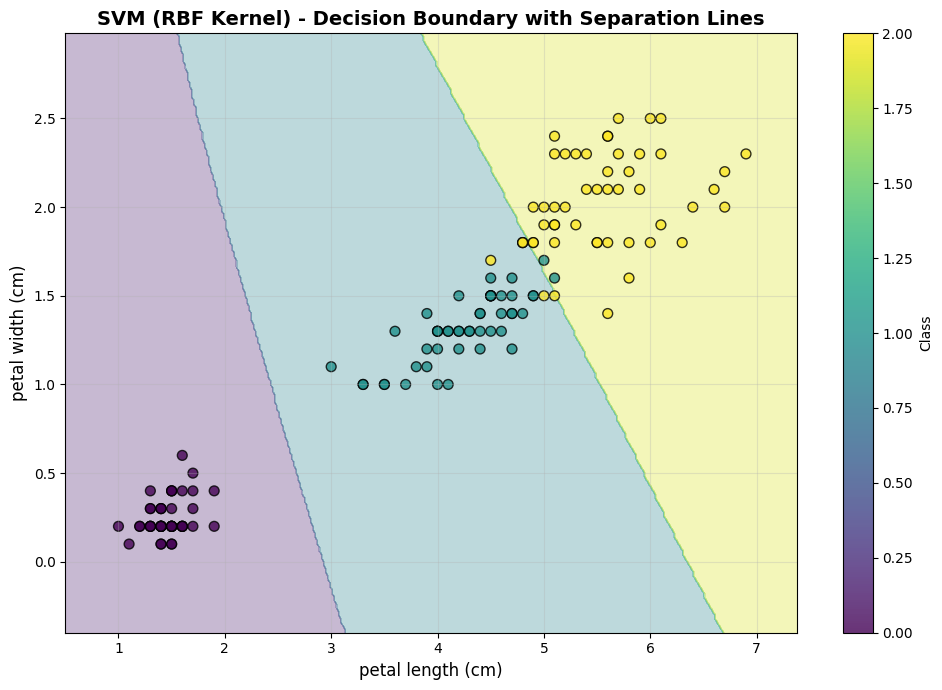

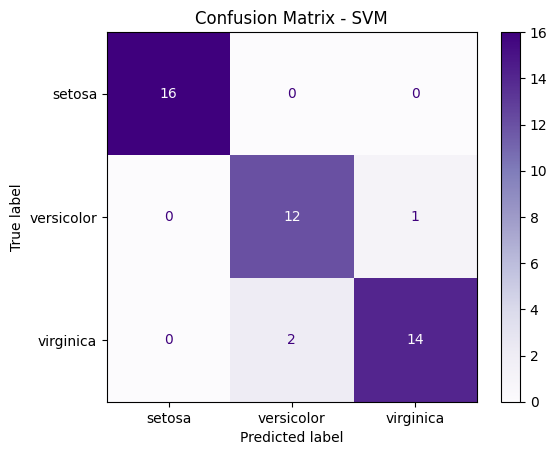

In [46]:
# Train SVM (Support Vector Machine) Classifier
from sklearn.svm import SVC

# Create and train the model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = svm_model.score(X_test, y_test)
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"Kernel: {svm_model.kernel}")
print(f"Number of support vectors: {svm_model.n_support_}")

# Visualize decision boundary with separation lines
plot_decision_boundary(svm_model, X, y, 
                      'SVM (RBF Kernel) - Decision Boundary with Separation Lines')

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, 
                                       display_labels=iris.target_names,
                                       cmap='Purples')
plt.title('Confusion Matrix - SVM')
plt.show()

### other classifiers

Check other classifiers available in scikit library (at least 2 more)


KNN Accuracy: 0.9778


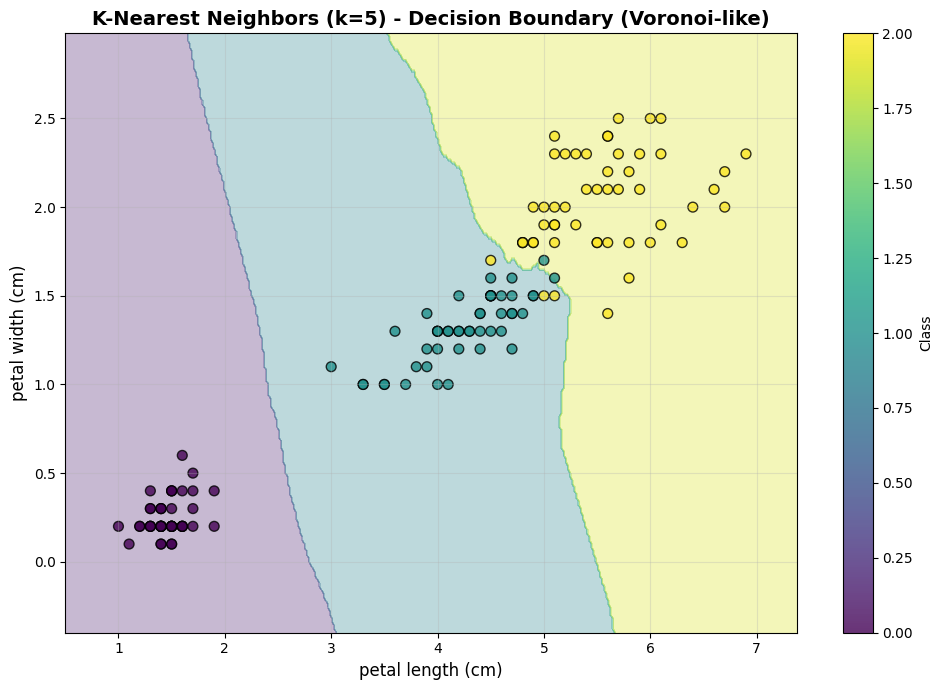

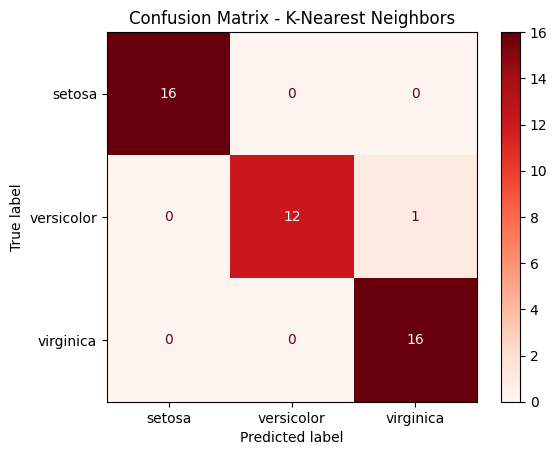


Gradient Boosting Accuracy: 0.9556


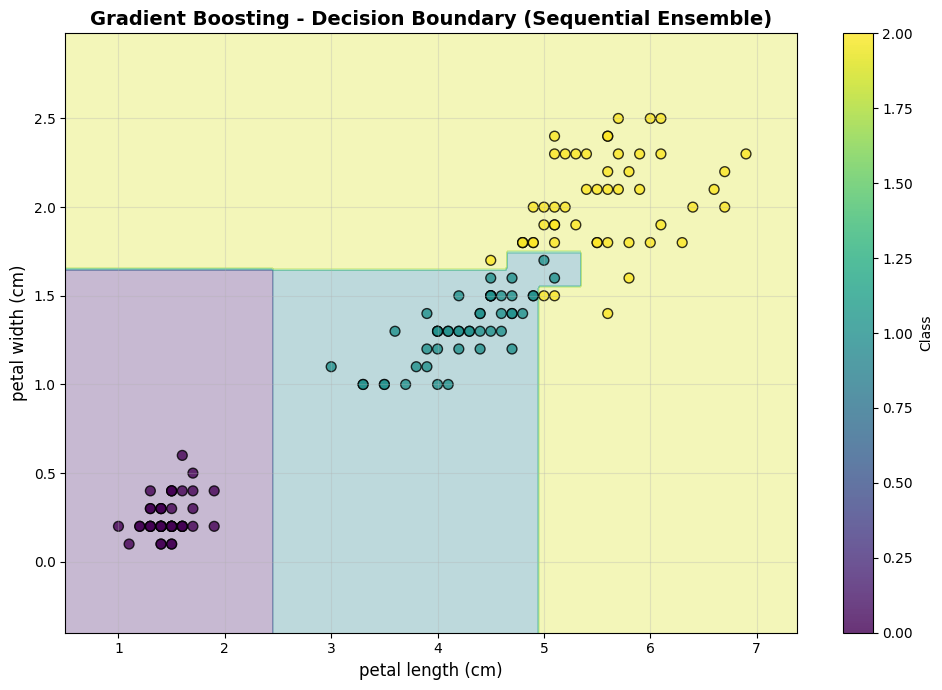

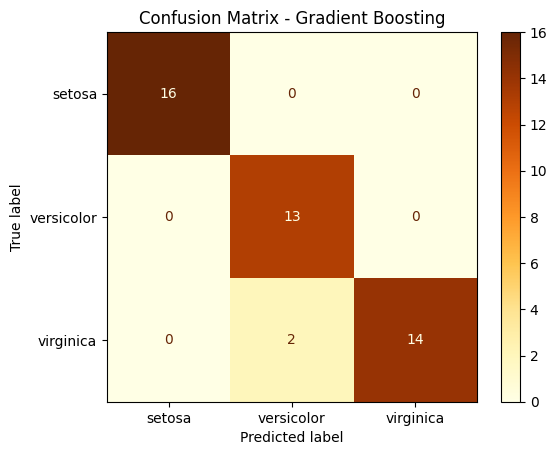


Naive Bayes Accuracy: 0.9556


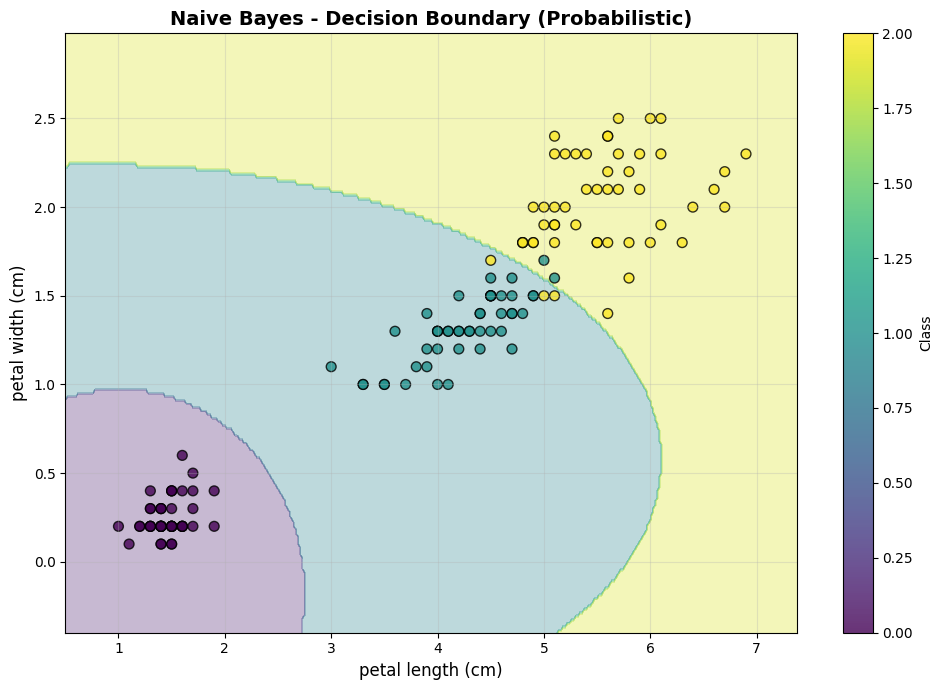

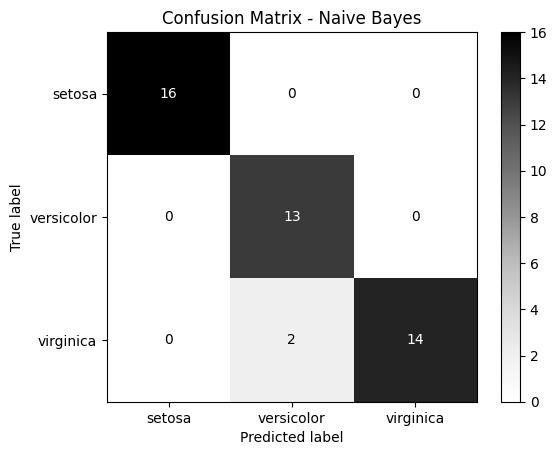


MODEL COMPARISON
              Model  Accuracy
                KNN  0.977778
  Gradient Boosting  0.955556
      Decision Tree  0.955556
        Naive Bayes  0.955556
Logistic Regression  0.933333
      Random Forest  0.933333
                SVM  0.933333


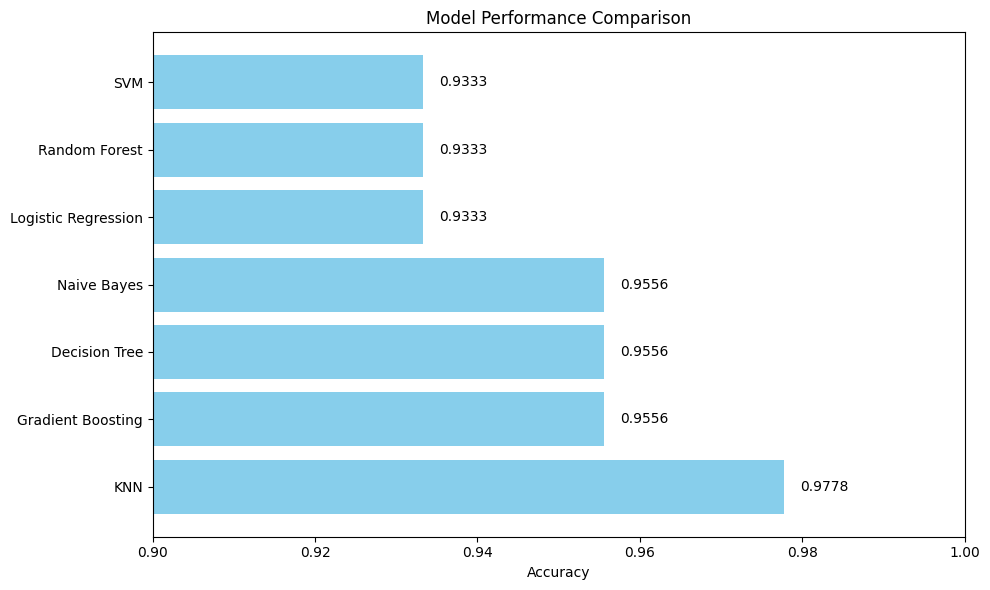

In [47]:
# Additional Classifiers

# 1. K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test, y_test)

print(f"KNN Accuracy: {accuracy_knn:.4f}")

# Visualize decision boundary for KNN
plot_decision_boundary(knn_model, X, y, 
                      'K-Nearest Neighbors (k=5) - Decision Boundary (Voronoi-like)')

# Display confusion matrix for KNN
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, 
                                       display_labels=iris.target_names,
                                       cmap='Reds')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

# 2. Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, 
                                      max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = gb_model.score(X_test, y_test)

print(f"\nGradient Boosting Accuracy: {accuracy_gb:.4f}")

# Visualize decision boundary for Gradient Boosting
plot_decision_boundary(gb_model, X, y, 
                      'Gradient Boosting - Decision Boundary (Sequential Ensemble)')

# Display confusion matrix for Gradient Boosting
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gb, 
                                       display_labels=iris.target_names,
                                       cmap='YlOrBr')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

# 3. Naive Bayes (Bonus)
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = nb_model.score(X_test, y_test)

print(f"\nNaive Bayes Accuracy: {accuracy_nb:.4f}")

# Visualize decision boundary for Naive Bayes
plot_decision_boundary(nb_model, X, y, 
                      'Naive Bayes - Decision Boundary (Probabilistic)')

# Display confusion matrix for Naive Bayes
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, 
                                       display_labels=iris.target_names,
                                       cmap='Greys')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# Compare all models
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 
              'SVM', 'KNN', 'Gradient Boosting', 'Naive Bayes'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, 
                 accuracy_svm, accuracy_knn, accuracy_gb, accuracy_nb]
}).sort_values('Accuracy', ascending=False)

print(models_comparison.to_string(index=False))

# Visualize model comparison
plt.figure(figsize=(10, 6))
plt.barh(models_comparison['Model'], models_comparison['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xlim([0.9, 1.0])
for i, v in enumerate(models_comparison['Accuracy']):
    plt.text(v + 0.002, i, f'{v:.4f}', va='center')
plt.tight_layout()
plt.show()